In [1]:
import tensorflow as tf
from PIL import Image
from model import cnn_model_fn
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from argparse import ArgumentParser

/Users/sudatakamune/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
model_dir = './model/etf8g_convnet_model'

In [3]:
etf8g_classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn, model_dir=model_dir)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './model/etf8g_convnet_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a1bb50eb8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [13]:
image = Image.open('ta.png')
predict_data = np.asarray(image).reshape(1, 1024).astype(np.float32)/255

In [14]:
predict_data

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

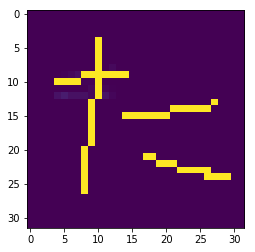

In [15]:
%matplotlib inline
def img_show(img):
    imshow(img)

img_show(predict_data.reshape(32, 32))

In [16]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": predict_data},
    shuffle=False)

In [17]:
predict_results = list(etf8g_classifier.predict(predict_input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model/etf8g_convnet_model/model.ckpt-30005
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [18]:
for i in predict_results:
    print(i)

{'classes': 25, 'probabilities': array([3.22418587e-31, 1.35127624e-35, 2.25028465e-25, 4.48260548e-18,
       3.50341115e-25, 1.83630941e-22, 2.40969470e-25, 3.33805862e-18,
       2.17168816e-23, 8.34108992e-28, 4.65639047e-26, 2.03539991e-32,
       1.67760438e-33, 1.22041934e-25, 4.92022025e-30, 2.44721177e-18,
       2.33184523e-24, 3.85445700e-33, 2.17959692e-31, 5.12918324e-27,
       1.97599630e-29, 1.90846400e-20, 4.28850403e-27, 1.03781785e-16,
       2.46925170e-23, 1.00000000e+00, 5.94423455e-10, 7.95169111e-20,
       3.12117193e-26, 1.60497743e-31, 1.35702914e-30, 6.07108743e-33,
       2.04926711e-25, 2.42296242e-22, 1.28197798e-25, 4.25866625e-29,
       5.35907327e-15, 3.66853411e-17, 1.32084874e-30, 1.39768738e-24,
       7.32948646e-37, 1.01727758e-26, 5.32607204e-32, 1.27857193e-28,
       4.27117962e-28, 3.19289757e-26, 8.91101716e-26, 2.46112975e-28,
       8.60350173e-28, 8.36692066e-24, 1.48358482e-25, 3.39471511e-18,
       3.24211956e-23, 2.55603358e-24, 1.622

In [19]:
classmapping = pd.read_csv('./classmapping.csv', usecols=['ひらがな'], encoding='cp932')

In [20]:
result = classmapping.iloc[predict_results[0]['classes']].ひらがな

In [21]:
print(result)

た
